In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, global_solution, multi_segmentation, segment_EV
from Single_nuclei_segmentation import Solv, segmented
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import gaussian_filter

from cvxopt import matrix

from skimage.measure import regionprops
import numpy as np

5it [00:00, 75.76it/s]


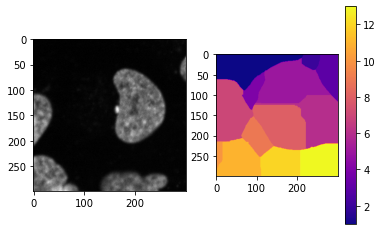

In [2]:
image = plt.imread('../images/dna-images/gnf/dna-0.png')[200:500, 200:500 ,0]
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')
plt.colorbar()

In [3]:
Z = list(S)
ListOfCoords = create_images(image, Omega, Z)

In [4]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-2)]: Done  18 out of  28 | elapsed:   14.3s remaining:    7.9s
[Parallel(n_jobs=-2)]: Done  21 out of  28 | elapsed:   15.9s remaining:    5.2s
[Parallel(n_jobs=-2)]: Done  24 out of  28 | elapsed:   17.8s remaining:    2.9s
[Parallel(n_jobs=-2)]: Done  28 out of  28 | elapsed:   19.1s finished


In [5]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

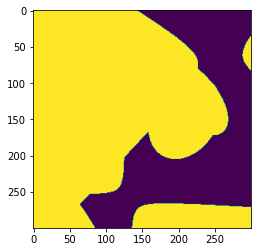

In [6]:
plt.imshow(seg)

In [7]:
u = global_solution(f, np.median(f), Omega, list(S))

In [8]:
np.nonzero(u)

(array([ 1,  8, 14, 16, 17, 19, 23, 24, 25], dtype=int64),)

In [9]:
print(f)

(4527.711904384477, 7.077927592449259e-06, 37.777301784954325, 7722.192305821549, 9898.539131120955, 6045.196309093324, 31.748709428910836, 1.993932786980138e-06, 545.2960670368818, 3069.7727387694313, 421.03779403634604, 5464.99235105728, 1409.616645432559, 1409.6174154297162, 236.05539377830115, 484.02328367644293, 1.1162030990122222e-06, 828.2057083237668, 308.9671627814537, 198.49154638534094, 3.142710460584244e-06, 4.215997894629847e-07, 4527.711946897805, 308.967672798926, 120.69332463178893, 37.77715198835862, 176.81329153454175, 1146.0386171466187)


In [10]:
np.array(f)[u == 1]

array([7.07792759e-06, 5.45296067e+02, 2.36055394e+02, 1.11620310e-06,
       8.28205708e+02, 1.98491546e+02, 3.08967673e+02, 1.20693325e+02,
       3.77771520e+01])